In [1]:
from IntrinsicDisorder.intermediate import Intermediate
from IsoformAnalysis.FastaToDF import FastaToDF
import IsoformAnalysis.IsoformAnalyzer as IsoformAnalyzer
import IsoformAnalysis.Protein_matcher as ProteinMatcher

In [2]:
interaction_data = Intermediate(
    input=[
        "Data/BioPlex_293T_Network_10K_Dec_2019.tsv",
        "Data/BioPlex_HCT116_Network_5.5K_Dec_2019.tsv",
        "Data/Huttlin_BioPlex3_Table_S1.xlsb",
        "Data/uniprotkb_AND_reviewed_true_AND_model_o_2024_02_28.fasta",
    ]
)

In [3]:
iso_lib = FastaToDF("Data/UP000005640_9606_additional.fasta").fasta

In [4]:
data_293T = interaction_data.unique_293T
data_HCT116 = interaction_data.unique_HCT116
isoforms_293T, index_293T = IsoformAnalyzer.get_dataset_count(data_293T, iso_lib)
isoforms_HCT116, index_HCT116 = IsoformAnalyzer.get_dataset_count(data_HCT116, iso_lib)

AttributeError: 'DataFrame' object has no attribute 'sort'

In [ ]:
isoforms_uniqueppi_293T = ProteinMatcher.get_uniqueppi_isoforms(data_293T, isoforms_293T, isoforms_HCT116, index_293T)
isoforms_uniqueppi_HCT116 = ProteinMatcher.get_uniqueppi_isoforms(data_HCT116, isoforms_HCT116, isoforms_293T, index_HCT116)

In [ ]:
index_uppi = IsoformAnalyzer.addition(isoforms_uniqueppi_293T, isoforms_uniqueppi_HCT116, None, "isoform")
proteins_uppi = IsoformAnalyzer.isoform_count(index_uppi)

c:\Users\Jack\Kod\Kex-klon\Exploring-cell-interactome\IsoformAnalysis\IsoformAnalyzer.py:156: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'A0AV02-2' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dataset.loc[dataset['canonical_protein'] == data_column_1, f'isoform_{i}'] = data_column_2_value
c:\Users\Jack\Kod\Kex-klon\Exploring-cell-interactome\IsoformAnalysis\IsoformAnalyzer.py:156: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'A0AVT1' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  dataset.loc[dataset['canonical_protein'] == data_column_1, f'isoform_{i}'] = data_column_2_value


In [ ]:
proteins_uppi

,canonical_protein,isoform_1,isoform_2,isoform_count
0,A0AV02,A0AV02-2,NaN,1
1,A0AV96,A0AV96-2,NaN,1
2,A0AVT1,A0AVT1-2,A0AVT1,2
3,A0FGR8,A0FGR8-2,NaN,1
4,A0MZ66,A0MZ66-3,A0MZ66-2,2
...,...,...,...,...
7197,TWISTNB,Q3B726,NaN,1
7198,C2orf50,Q96LR7,NaN,1
7199,ARL11,Q969Q4,NaN,1
7200,LACTB2,Q53H82,NaN,1


ValueError: Axis limits cannot be NaN or Inf

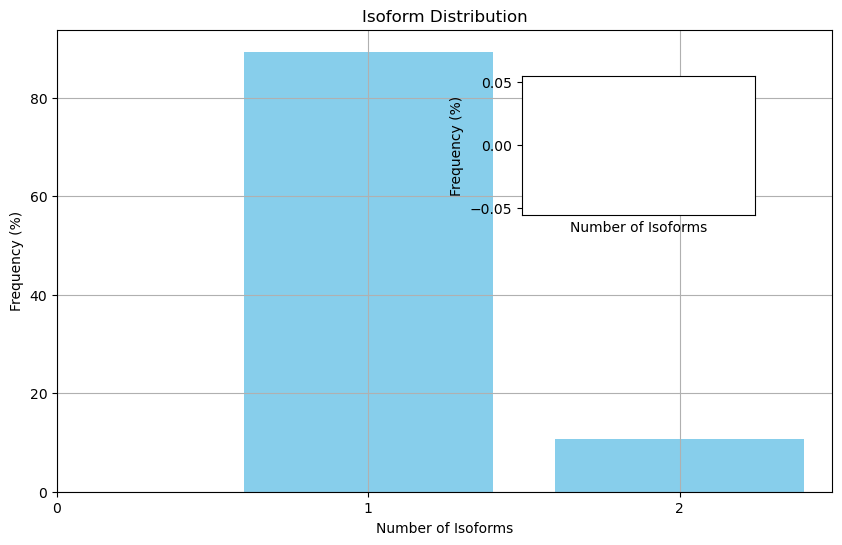

In [ ]:
IsoformAnalyzer.isoform_distribution(proteins_uppi)